 ### Introducing to neural network classifications with tensorflow

 in this notebook we're going to learn how to write neural networks for classification problems.

 A classification Problem is where you try to classify something as one thing or another.

 a few types of classification problem:
 * Binary classification
 * Multi-class classification
 * Multi-label classification

## creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

#create circles
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

X

Our data is now hard to understand ... lets visualize it

In [ ]:
import pandas as pd
circle = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1],'label':y})
circle

In [ ]:
#visualize with the plot
import matplotlib.pyplot as plt
plt.scatter([X[:,0]], [X[:,1]], c=y, cmap=plt.cm.RdYlBu)
plt.show()## Building a neural network with tensorflowimport tensorflow as tf


see (Playground.tensorflow.org)[http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36443&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false]

### Input and output shapes

In [ ]:
# check the shapes of our features and labels
X.shape, y.shape

In [ ]:
# how many samples
len(X) , len(y)

### steps in modeling

the steps in modelling with Tensorflow are typically:
1. create or import model
2. compile the model
3. fit the model
4. evaluate the model
5. tweak
6. evaluate...

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])# percent

model.fit(X,y, epochs=5)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])# percent

model_1.fit(X,y, epochs=200)

In [ ]:
model_1.evaluate(X,y)

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's a performing as if it's guessing.

so lets add extra layers.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])# percent

model.fit(X,y, epochs=100)

## Improve our model

1. creatinf a model - add more layers
2. compiling a model - choose different opt such as Adam
3. fit the model - more epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100),# new
  tf.keras.layers.Dense(10),# new
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])# percent

model_2.fit(X,y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X,y)

# visualize

for that lets create a function (`plot_decision_boundary()`)

* take in a trained model, feutures (X) and labels (y)
* create a meshgrid of the different X values 
* make predictions 
* plot the prediction as well as a line between zones where each unique class falls


In [ ]:
x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

In [ ]:
import numpy as np

def plot_desision_boundary(model, X, y):
  """
  plot the decision boundary created by a model predicting on X.
  cs231 neural networks case study
  made with ml
  """
  # define the axis boundaries of the plot and create a meshgrid
  x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
  
#create X values(we're going to prediction on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2d arrays together
  
  # make predictions
  y_pred = model.predict(x_in)
  
  # check for multi-class
  if len(y_pred[0]) > 1 :
    print('multiclass')
    # we have to reshape our predictions
    y_pred = np.argmax(y_pred, axis=-1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    
    #plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y,s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max()) #limit of x axes
    plt.ylim(yy.min(), yy.max())
    plt.show()


In [ ]:
# check the predicctions our model
plot_desision_boundary(model_2, X, y)

### Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(3, activation='relu'),# new (linear - sigmoind)
  tf.keras.layers.Dense(4, activation='relu'),# new
 
])

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])# percent

history = model_5.fit(X,y, epochs=100)

### model activation

we need model activation (Sigmoid) for our output layer in binary crossentropy 

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_6 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),# new (linear - sigmoind)
  tf.keras.layers.Dense(4, activation='relu'),# new
  tf.keras.layers.Dense(1, activation='sigmoid'),# new - multi is softmax
])

# compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])# percent

history = model_6.fit(X,y, epochs=130)

In [ ]:
plot_desision_boundary(model_6, X, y)

**Note:** The combination of **linear (straight lines) and non-linear (non-straigh lines) functions** is one of the key fundamentals of neural networks.

In [ ]:
# create a toy tensor (similar to our data)
A=tf.cast(tf.range(-10,10),tf.float32)
A

In [ ]:
#visualize
plt.plot(A)
plt.show()

In [ ]:
# lets starm by replicating sigmoid- sigmoid(x) = 1 / (1+ exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use our sigmoid on our tensot
sigmoid(A)

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# lets replicate relu function
def relu(x):
  return tf.maximum(0,x)

In [ ]:
plt.plot(relu(A))

### Evaluating and improving our classificiation
ml-cheatsheet.readhedocs.io

so far we've training and testing on the same dataset ...
however, in machine learning this is basically a sin.
So lets create a training and test set.

In [ ]:
# split into train and test sets
X_train,y_train = X[:800], y[:800]
X_test,y_test = X[800:], y[800:]



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_7 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),# new (linear - sigmoind)
  tf.keras.layers.Dense(4, activation='relu'),# new
  tf.keras.layers.Dense(1, activation='sigmoid'),# new - multi is softmax
])

# compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])# percent

history = model_7.fit(X_train,y_train, epochs=130)

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_desision_boundary(model_7, X_train, y_train)
plt.subplot(2, 2, 2)
plt.title('test')
plot_desision_boundary(model_7, X_test, y_test)

## plot the loss (or training) curve


In [ ]:
# convert the history object into a DataFrame
pd.DataFrame(history.history)


In [ ]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title('model_8 loss curve')

it shows our model is improving

### finding the best learning rate

to find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.

* Another model (we could use the same one as above, but we're practicing building models here)

* A modified loss curves plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# create the model using the sequential API
model_9 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),# new (linear - sigmoind)
  tf.keras.layers.Dense(4, activation='relu'),# new
  tf.keras.layers.Dense(1, activation='sigmoid'),# new - multi is softmax
])

# compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])# percent

# create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))# new

history_9 = model_9.fit(X_train,y_train, epochs=100,callbacks=[lr_scheduler])        

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel='epoch')

In [ ]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(12,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

In [ ]:
# example of other learning rates
10**0, 10**-1, 10**-2, 10**-3, 1e-4

In [ ]:
#Lets try using a higher *ideal* learning rate with the same model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model with the ideal learningrate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),metrics=['accuracy'])

history_10 = model_10.fit(X_train,y_train, epochs=20)


In [ ]:
#plot the decision boundaries for the training and test sets
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)#row-col-section
plt.title('train')
plot_desision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_desision_boundary(model_10, X_test, y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possiible, there are a handful of other classification evaluation methods & metrics you should be familiar with.
* Accuracy
* Precision
* Recall
* F1 score
* Confusion matrix
* classification report (from scikit-learn)


In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{accuracy*100}")

How about a confusion matrix?


In [46]:
#create a confution matrix
from sklearn.metrics import confusion_matrix

#make prediction
y_preds= model_10.predict(X_test)

#Create confusion matrix
confusion_matrix(y_test,y_preds)

NameError: name 'model_10' is not defined

In [ ]:
y_test[:10]

In [ ]:
y_preds

Oobs... looks like our predictions array has come out in prediction probability form... the standard output from the sigmoid(or softmax) activation fuctions.

In [ ]:
# convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

In [ ]:
# create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

How about we prettify our confusion matrix?

In [65]:
# Note:the  confution matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test,y_preds,classes=None):
    figsize=(15,15)
# create the confusion matrix
    # cm = confusion_matrix(y_test,tf.round(y_preds))
    cm = confusion_matrix(y_test,y_preds)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
    n_classes =cm.shape[0]
#lets prettify it
    fig, ax = plt.subplots(figsize=figsize)
#create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
# create classes

    if classes:
      labels= classes
    else:
      labels = np.arange(cm.shape[0])
# label the axis
    ax.set(title='Confusion Matrix', xlabel = 'predict Label',ylabel= 'true label',xticks=np.arange(n_classes),yticks=np.arange(n_classes),xticklabels=labels, yticklabels=labels) #np.arange(start, stop, step) like range
# set x axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()
#adjust label size
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    ax.title.set_size(10)
# set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
#Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",horizontalalignment='center',color='white' if cm[i,j] > threshold else 'black',size=15)



In [ ]:
plot_confusion_matrix(y_test,y_preds)

## Working with multiclass classification
when you have more than two class , its known as **multi-class classification** .
* this means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

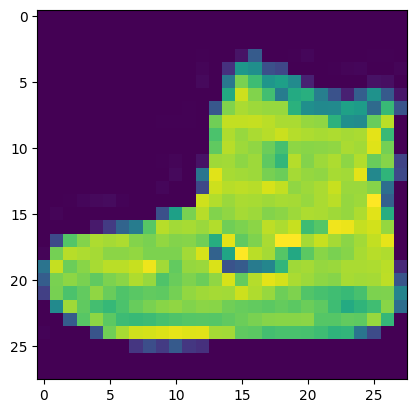

In [5]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

Text(0.5, 1.0, 'T-shirt/top')

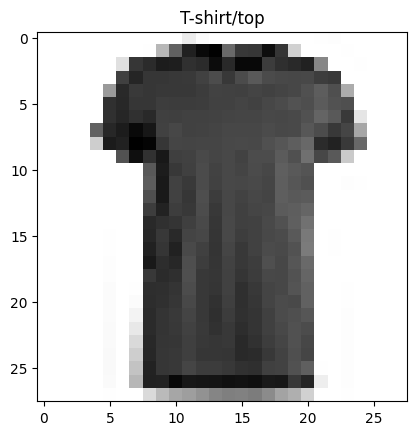

In [6]:
# create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

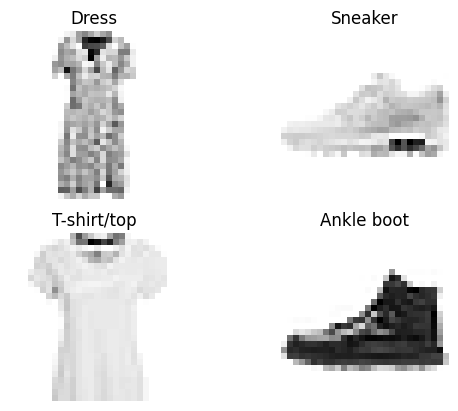

In [7]:
# plot multiple random images of fashion MNIST
import random
plt.Figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i +1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis('off')

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classification, however, we going to have to tweak a few things.
* Input shape = 28 x 28
* Output shape = 10 (one per class)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
 * if your labels are one-hot encoded, use CategoricalCrossentropy()
 * if your Lebels are integer form, use SparseCategoricalCrossentropy()
* Output layer activatiom = Softmax (not sigmoid)


In [8]:
train_data[0].shape

(28, 28)

In [10]:
# Our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [11]:
28*28

784

In [12]:
train_labels[:10] #interger is not one_hot cat:   [1, 0, 0] labels = ['cat', 'dog', 'bird']

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [20]:
# set random seed

tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#flat the layer, does not effect the batch size
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'), 
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])# loss, optimizer, metrics / #Sparse for nummerical

#Fit the model
with tf.device('/cpu:0'):non_norm_history = model_11.fit(train_data,train_labels,epochs=10, validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0974 - loss: 2.6650 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3031
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [ ]:
# check the model summery
model_11.summary()

In [13]:
# ckeck the min and max
train_data.min(), train_data.max()

(0, 255)

neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [14]:
# we can get our training and testing data between 0 and 1 by dividing by th maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [18]:
# set random seed

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#flat the layer, does not effect the batch size
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'), 
  tf.keras.layers.Dense(10, activation='softmax'),
])

# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])# loss, optimizer, metrics / #Sparse for nummerical

#Fit the model
with tf.device('/cpu:0'):norm_history = model_12.fit(train_data_norm,train_labels,epochs=10, validation_data=(test_data_norm,test_labels))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4142 - loss: 1.5167 - val_accuracy: 0.7026 - val_loss: 0.7931
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7199 - loss: 0.7545 - val_accuracy: 0.7556 - val_loss: 0.6962
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7672 - loss: 0.6662 - val_accuracy: 0.7834 - val_loss: 0.6399
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7866 - loss: 0.6149 - val_accuracy: 0.7901 - val_loss: 0.6118
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7971 - loss: 0.5878 - val_accuracy: 0.7960 - val_loss: 0.5960
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8028 - loss: 0.5702 - val_accuracy: 0.7997 - val_loss: 0.5852
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8065 - loss: 0.5575 - val_accuracy: 0.8018 - val_loss: 0.5772
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8099 - loss: 0.5479 - 

>**Note:** neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 &1 )

<Axes: title={'center': 'normalized data'}>

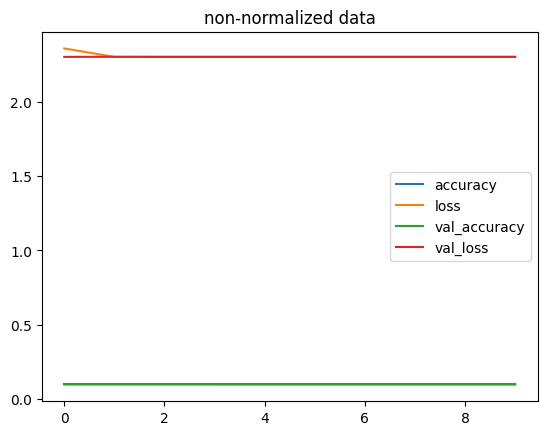

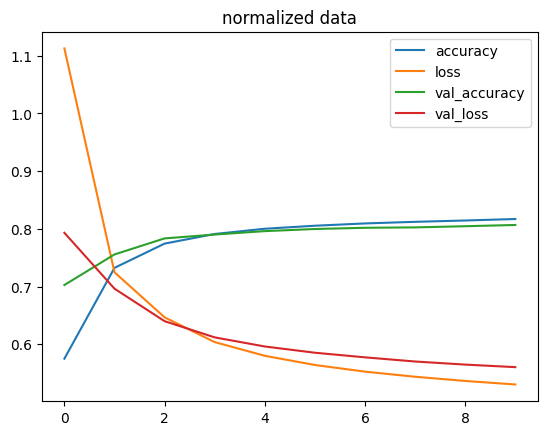

In [22]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='non-normalized data')
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='normalized data')

>**Note:** The same model with even *slightly* different data can product *dramaticaly* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture.)

## Finding the ideal learning rate

In [35]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#flat the layer, does not effect the batch size
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

# compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20) )
#Fit the model
with tf.device('/cpu:0'):
  find_lr_history = model_13.fit(train_data_norm,train_labels,epochs=40, validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2051 - loss: 2.0305 - val_accuracy: 0.2855 - val_loss: 1.6766 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3158 - loss: 1.6190 - val_accuracy: 0.3255 - val_loss: 1.5174 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3850 - loss: 1.4293 - val_accuracy: 0.6006 - val_loss: 1.0853 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6554 - loss: 0.9522 - val_accuracy: 0.7039 - val_loss: 0.7998 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7106 - loss: 0.7829 - val_accuracy: 0.7210 - val_loss: 0.7542 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7259 - loss: 0.7431 - val_accuracy: 0.7209 - val_loss: 0.7382 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7329 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

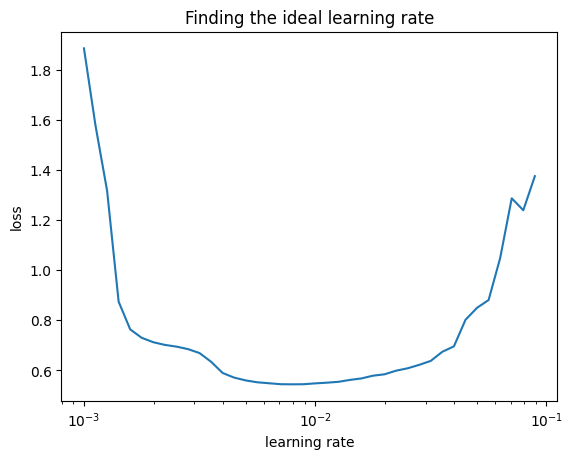

In [36]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Finding the ideal learning rate')

In [37]:
1e-3

0.001

In [68]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#flat the layer, does not effect the batch size
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

# compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
# create the learning rate callback

#Fit the model
with tf.device('/cpu:0'):
  find_lr_history = model_14.fit(train_data_norm,train_labels,epochs=10, validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3294 - loss: 1.7402 - val_accuracy: 0.6590 - val_loss: 0.8756
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6884 - loss: 0.8208 - val_accuracy: 0.7274 - val_loss: 0.7544
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7379 - loss: 0.7264 - val_accuracy: 0.7467 - val_loss: 0.7058
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7568 - loss: 0.6830 - val_accuracy: 0.7536 - val_loss: 0.6837
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7648 - loss: 0.6618 - val_accuracy: 0.7596 - val_loss: 0.6700
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7686 - loss: 0.6477 - val_accuracy: 0.7636 - val_loss: 0.6599
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7719 - loss: 0.6369 - val_accuracy: 0.7671 - val_loss: 0.6518
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7756 - loss: 0.6284 - 

## evaluating our multi-class classification model

to evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* save and exported to use in our application 

# create our confution matrix


In [69]:
# make some predictions with our models
y_props = model_14.predict(test_data_norm)
# convert all prediction probabilities into integers
y_props = y_props.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [70]:
y_props 

array([9, 2, 1, ..., 8, 1, 5])

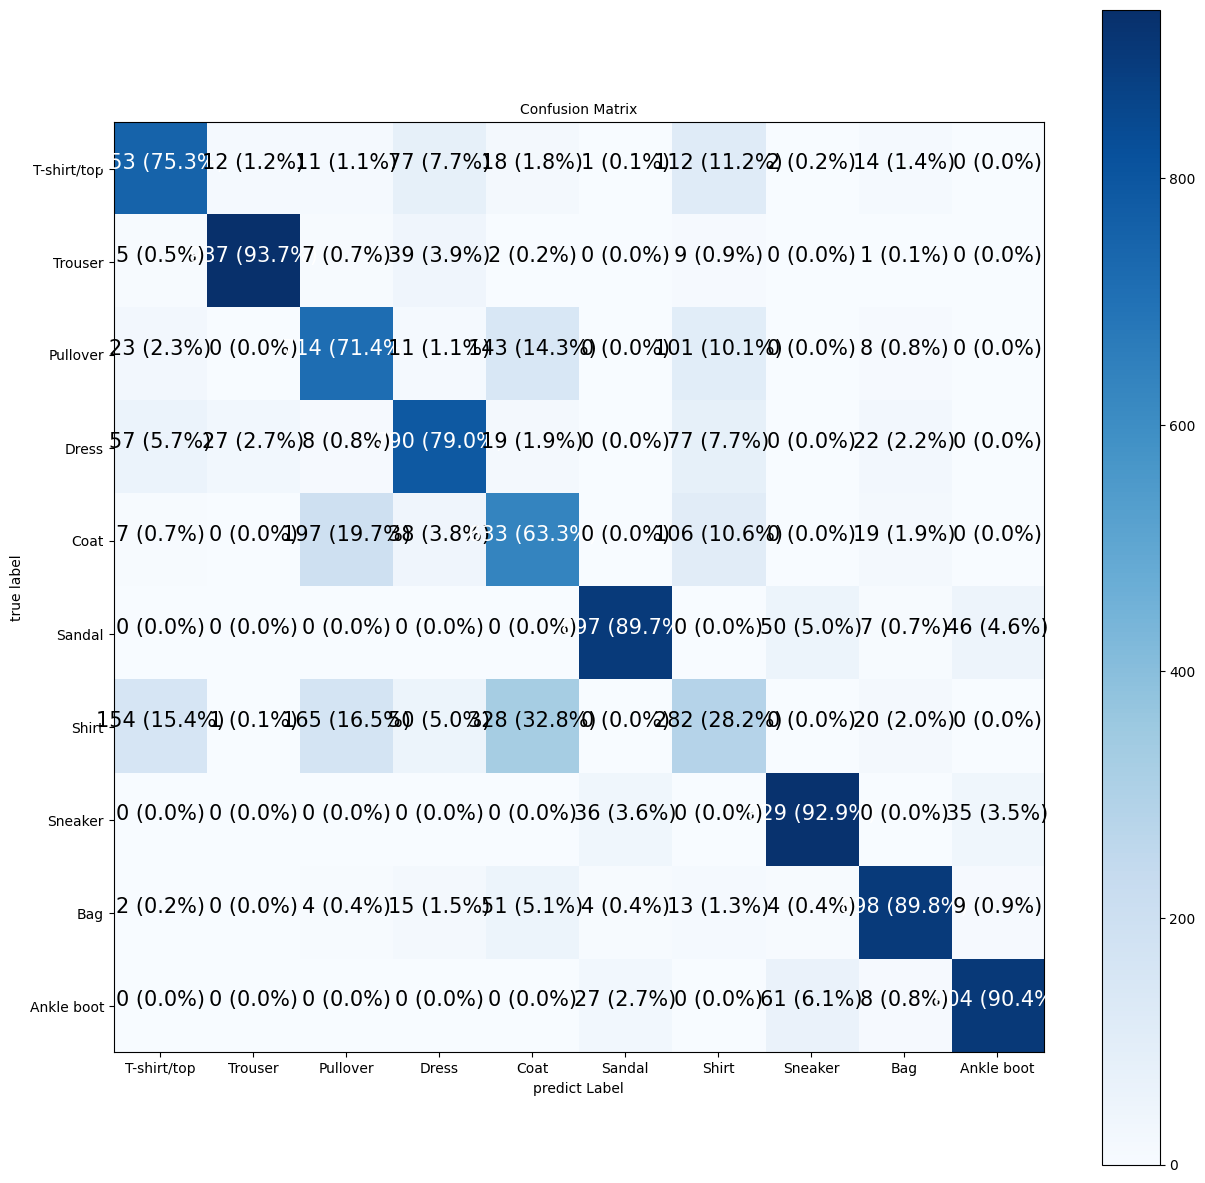

In [71]:
plot_confusion_matrix(test_labels, y_props,classes=class_names)

>**Note:**often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create little function for :
* plot a random image
* make a prediction on said image
* Label the plot with the truth label & the predicted label

In [72]:
import random

def plot_random_image(model,images,true_labels,classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  
  # Set up random integer
  i = random.randint(0, len(images))
  
  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  
  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)
  
  # chane the color of title depending if the pred if write or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color='red'
  
  # add xlabel information (prediction/true label)
  plt.xlabel("Pred:{} {:2.0f}% (True: {})".format(pred_label,100*tf.reduce_max(pred_probs),true_label), color=color)
  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


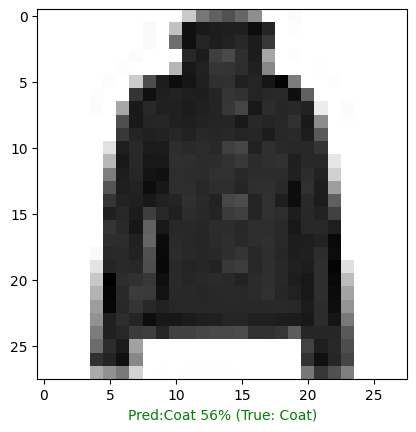

In [97]:
# check out a random image as well as its prediction
plot_random_image(model_14,images = test_data_norm,true_labels=test_labels ,classes=class_names) # always make predicton on the same kind of data your model was trained on.

# what pattern is our model learning?

In [98]:
# Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_18, built=True>,
 <Dense name=dense_48, built=True>,
 <Dense name=dense_49, built=True>,
 <Dense name=dense_50, built=True>]

In [99]:
# Extract a particular layer
model_14.layers[1]

<Dense name=dense_48, built=True>

In [100]:
# get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.3333233 , -0.31210044, -0.05315345,  0.11855524],
        [ 0.5795228 , -0.8439235 ,  0.05418807, -0.15604812],
        [ 0.7365594 , -0.20693876,  0.04541864, -0.5866901 ],
        ...,
        [-0.11022215, -0.34714288,  0.07783985, -0.47744566],
        [-0.33170366, -0.00133311,  0.09360462, -0.10279799],
        [ 0.22342178, -0.04650042, -0.07264718, -0.18158782]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector ...

In [101]:
# Bias and biases shapes
biases, biases.shape

(array([-0.06823651, -0.5394383 , -0.01990635,  0.56756836], dtype=float32),
 (4,))

Every nezron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intitalized as zeros (at least in the case of dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

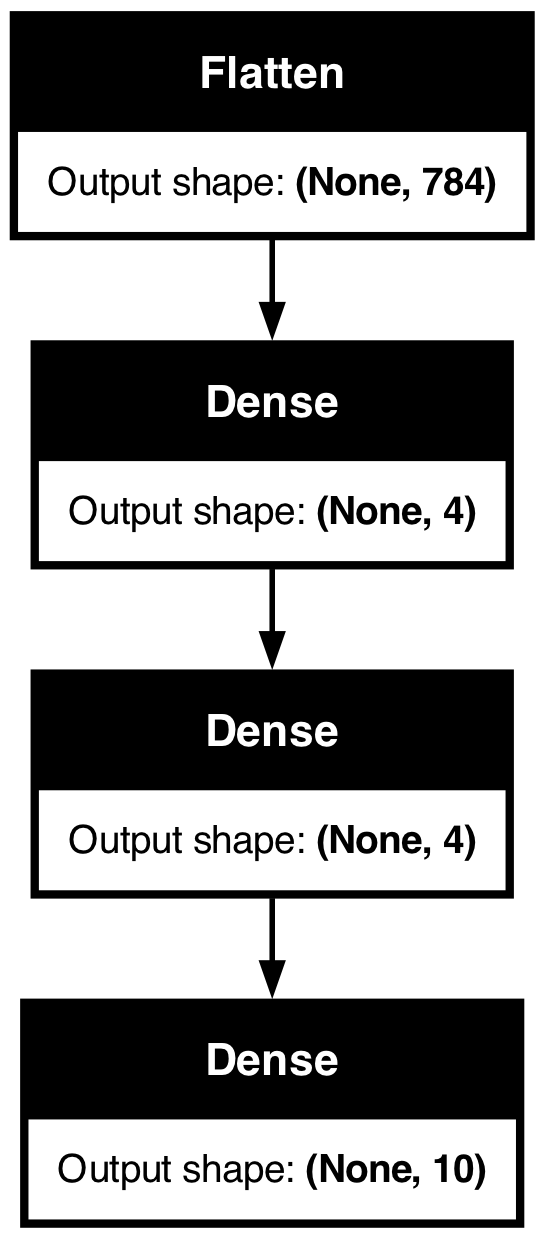

In [102]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

